# Data Cleaning

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%matplotlib inline

In [126]:
df = pd.read_csv('kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It appears that most categories are not missing any observations.


Date is an object, this is ok
sqft_basement should be converted into an integer like other sqft measurements

In [127]:
df.sqft_basement.value_counts().head()
# there are 454 houses with '?' as basement square footage
# possibility of dropping these values, or changing to 0
# worth checking if sqft_living is different to sqft_above, which would indicate there is a basement

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [128]:
# df.loc[(df.sqft_basement == '?')]?
# df.applymap(lambda x_id: df.iloc[x_id, :].sqft_living - x.iloc[x_id, :].sqft_above if x == '?' else x.sqft_basement)

def compute_sqft_basement(observation):
    if observation.sqft_basement == '?':
        observation.sqft_basement = observation.sqft_living - observation.sqft_above
    return observation

df = df.apply(compute_sqft_basement, axis=1)
# df.head()
df.sqft_basement.value_counts().head()
# we got rid of the '?' now, but need to convert it from object to float

0.0      12826
0          284
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [129]:
df.sqft_basement = pd.to_numeric(df.sqft_basement)



In [130]:
df.sqft_basement.value_counts().head()

0.0      13110
600.0      221
700.0      218
500.0      214
800.0      206
Name: sqft_basement, dtype: int64

In [131]:
df.sqft_basement = df.sqft_basement.astype(np.int64)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 3.5+ MB


In [133]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront has 2376 null values (use mapping to explore these)
View has 63 null values. Could possibly just get rid of these as they are a small number
And yr_renovated has 3842 null values (indicates that it has not been renovated)

# 2.1 Creating New Variables

2.1.1 *Creating a new variable of house age* 

This might be more useful later on. Can do this by doing 2015 - yr_built

In [134]:
df['house_age'] = df.yr_built.map(lambda x: 2015 - x)
df.head()
# now a new category has been added to the data set which utilises a lambda function 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,28


2.1.2 *Creating a dummy variable for renovation*

Give it a value of 1 if it has been renovated, 0 if not. 
This may be useful in our analysis. i.e. does a house being renovated increase house price. 

In [135]:
df['renovated'] = df.yr_renovated.map(lambda x: 1 if x > 0 else 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,60,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,64,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,1933,NaN,98028,47.7379,-122.233,2720,8062,82,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,50,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,28,0


# 3.1 Dropping Outliers

In [136]:
df.describe()
# there appears to be a property with 33 bedrooms, as this seems very high, it may be worth checking

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,...,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,...,291.725008,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,44.000324,0.034449
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,...,442.667800,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234,0.182384
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,1.000000


3.1.1 *Dropping bedroom outliers*

In [137]:
df.loc[df['bedrooms'] == 33]
# it appears that this 33 bedrooms house only has 1.75 bathrooms, 1620 sqft living space. This is not feasible and is likely to be a typo. We could change the value of bedrooms to 3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,580,1947,0.0,98103,47.6878,-122.331,1330,4700,68,0


In [138]:
df.bedrooms = df.bedrooms.replace([33], 3)
# this line replaces that observation's bedroom from 33 to 3
# can check by locating by index number 15856
df.iloc[15856]

id               2402100895
date              6/25/2014
price                640000
bedrooms                  3
bathrooms              1.75
sqft_living            1620
sqft_lot               6000
floors                    1
waterfront                0
view                      0
condition                 5
grade                     7
sqft_above             1040
sqft_basement           580
yr_built               1947
yr_renovated              0
zipcode               98103
lat                 47.6878
long               -122.331
sqft_living15          1330
sqft_lot15             4700
house_age                68
renovated                 0
Name: 15856, dtype: object

*Dealing with the null values in view*

View is an index which should contain a value, a null value indicates missing data. Seeing as there are only 63 missing observations, as this doesn't represent a large proportion of the data set, we will also be dropping these

In [139]:
# Ok can't seem to do this so ask tomorrow
df.drop(labels = df.loc[df.view.isnull()].index, axis = 0 , inplace = True)


In [140]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
house_age           0
renovated           0
dtype: int64

*Dealing with null values in yr_renovated*

We could take yr_renovated null values to just be houses which have not been renovated.
So replace all null values with 0

In [141]:
df.yr_renovated.fillna(0, inplace = True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
house_age           0
renovated           0
dtype: int64

3.1.2 *Dropping bathroom outliers*

It also looks like several properties have 0.5 bathrooms. This is pretty unfeasible and may indicate student housing etc which we are not interested in.
We will also drop these from the dataframe

In [142]:
display(df.bathrooms.value_counts(normalize = True))
# As can be seen, 0.5 bathrooms represents a very small proportion of the data, so can drop this
df = df.loc[~(df['bathrooms'] < 0.75)]



2.50    0.249094
1.00    0.178369
1.75    0.140940
2.25    0.094595
2.00    0.089440
1.50    0.066917
2.75    0.055029
3.00    0.034922
3.50    0.033900
3.25    0.027166
3.75    0.007198
4.00    0.006316
4.50    0.004644
4.25    0.003576
0.75    0.003297
4.75    0.001068
5.00    0.000975
5.25    0.000604
5.50    0.000464
1.25    0.000418
6.00    0.000232
5.75    0.000186
0.50    0.000186
8.00    0.000093
6.25    0.000093
6.75    0.000093
6.50    0.000093
7.50    0.000046
7.75    0.000046
Name: bathrooms, dtype: float64

3.1.2 *Dropping sqft_living outliers*

Text(0, 0.5, 'Number of Homes')

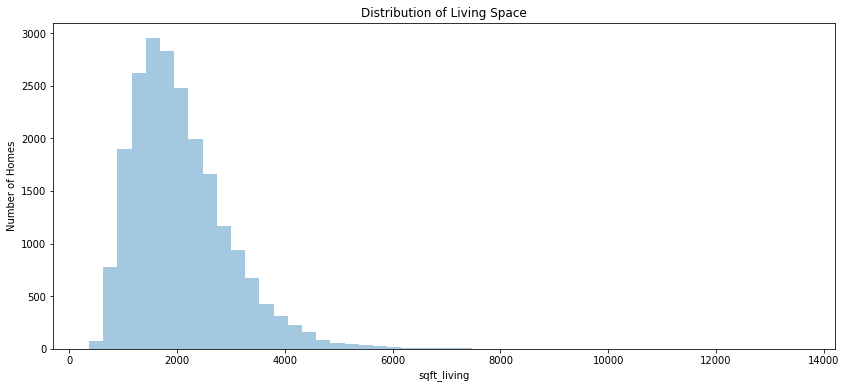

In [143]:
# plotting the distribution with a histogram
f, ax = plt.subplots(figsize = (14, 6))
fig = sns.distplot(df['sqft_living'], bins = 50, kde = False)
plt.title('Distribution of Living Space')
plt.ylabel('Number of Homes')


In [144]:
display('Skewness: %f' % df['sqft_living'].skew())
display('Kurtosis: %f' % df['sqft_living'].kurt())
# there is some positive skew and it actually is relatively close to normality
# tails off a lot after 4,000 so may be worth getting rid of some extreme values

'Skewness: 1.469948'

'Kurtosis: 5.240594'

In [145]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR_sqft_living = Q3 - Q1
# to calculate outliers we are using an upper outer threshold of 3*IQR + Q3, Q1 - 3*IQR

In [146]:
df = df.loc[~ (df['sqft_living'] > 3*IQR_sqft_living + Q3) & ~(df['sqft_living'] < Q1 - 3*IQR_sqft_living)]
df.describe()
# now can be seen that our max value of sqft_living is 4970 and min is 720

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,2.145700e+04,2.145700e+04,21457.000000,21457.000000,21457.000000,2.145700e+04,21457.000000,19092.000000,21457.000000,21457.000000,...,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000,21457.000000
mean,4.584041e+09,5.333053e+05,3.366594,2.106888,2063.023722,1.488291e+04,1.492403,0.007176,0.228923,3.410356,...,287.149415,1970.944727,68.648273,98078.020087,47.560049,-122.214220,1980.535257,12606.438272,44.055273,0.034394
std,2.876986e+09,3.367286e+05,0.899094,0.750384,868.093229,4.068302e+04,0.539188,0.084408,0.756082,0.651098,...,432.584071,29.362251,363.755658,53.501155,0.138674,0.140637,676.279892,26366.930470,29.362251,0.182244
min,1.000102e+06,7.800000e+04,1.000000,0.750000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.124049e+09,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.470500,-122.329000,1481.000000,5100.000000,18.000000,0.000000
50%,3.904980e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000,0.000000
75%,7.312400e+09,6.400000e+05,4.000000,2.500000,2540.000000,1.061500e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678200,-122.125000,2360.000000,10053.000000,64.000000,0.000000
max,9.900000e+09,3.850000e+06,11.000000,7.500000,5860.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,115.000000,1.000000


Text(0, 0.5, 'Number of Homes')

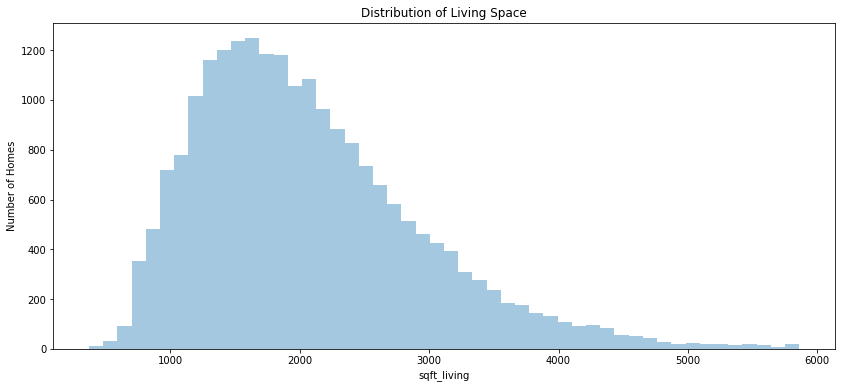

In [147]:
f, ax = plt.subplots(figsize = (14, 6))
fig = sns.distplot(df['sqft_living'], bins = 50, kde = False)
plt.title('Distribution of Living Space')
plt.ylabel('Number of Homes')
# is much easier to see the distribution now
# positive skew

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21457 entries, 0 to 21596
Data columns (total 23 columns):
id               21457 non-null int64
date             21457 non-null object
price            21457 non-null float64
bedrooms         21457 non-null int64
bathrooms        21457 non-null float64
sqft_living      21457 non-null int64
sqft_lot         21457 non-null int64
floors           21457 non-null float64
waterfront       19092 non-null float64
view             21457 non-null float64
condition        21457 non-null int64
grade            21457 non-null int64
sqft_above       21457 non-null int64
sqft_basement    21457 non-null int64
yr_built         21457 non-null int64
yr_renovated     21457 non-null float64
zipcode          21457 non-null int64
lat              21457 non-null float64
long             21457 non-null float64
sqft_living15    21457 non-null int64
sqft_lot15       21457 non-null int64
house_age        21457 non-null int64
renovated        21457 non-null int64


3.1.3 *Dropping sqft_lot outliers* 

There seems to be some properties with extreme values of sqft_lot. This may indicate a farm or soem plot of land that is not representative of the dataset

Text(0, 0.5, 'Number of Homes')

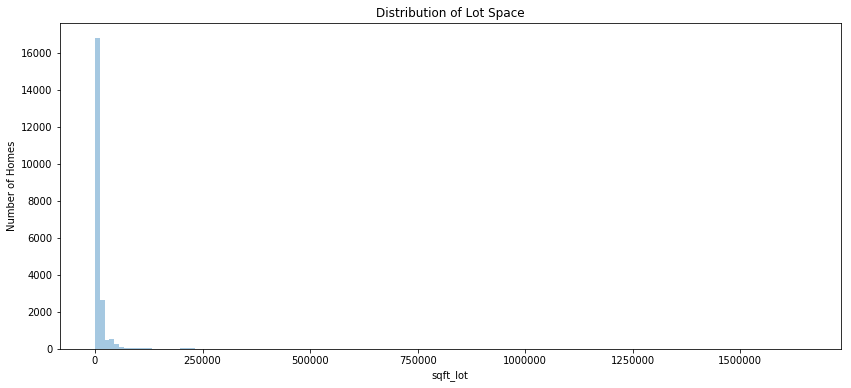

In [149]:
# plotting the distribution with a histogram
f, ax = plt.subplots(figsize = (14, 6))
fig = sns.distplot(df['sqft_lot'], bins = 150, kde = False)
plt.title('Distribution of Lot Space')
plt.ylabel('Number of Homes')

In [150]:
display('Skewness: %f' % df['sqft_lot'].skew())
display('Kurtosis: %f' % df['sqft_lot'].kurt())
# extreme positive skew
# normality has kurtosis of 3, so the distribution of sqft_lot is not normal

'Skewness: 13.335594'

'Kurtosis: 299.147396'

In [151]:
Q1 = df['sqft_lot'].quantile(0.25)
Q3 = df['sqft_lot'].quantile(0.75)
IQR_sqft_lot = Q3 - Q1
# to calculate outliers we are using an upper outer threshold of 3*IQR + Q3, Q1 - 3*IQR

In [152]:
df = df.loc[~ (df['sqft_lot'] > 3*IQR_sqft_lot + Q3) & ~(df['sqft_lot'] < Q1 - 3*IQR_sqft_lot)]
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,1.971500e+04,1.971500e+04,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,17523.000000,19715.000000,19715.000000,...,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000
mean,4.709789e+09,5.229475e+05,3.355516,2.084276,2007.685569,7852.705808,1.489602,0.006163,0.219173,3.412478,...,286.504692,1970.274715,67.844281,98080.335328,47.562187,-122.226149,1933.316307,7787.172102,44.725285,0.033984
std,2.872968e+09,3.318192e+05,0.902219,0.745650,832.627113,4447.829033,0.543664,0.078267,0.737754,0.652981,...,426.213055,29.923566,361.735725,54.219337,0.136301,0.133026,650.529093,5469.276484,29.923566,0.181193
min,1.000102e+06,7.800000e+04,1.000000,0.750000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000,0.000000,0.000000
25%,2.249650e+09,3.150000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,1950.000000,0.000000,98033.000000,47.479300,-122.334000,1460.000000,5000.000000,17.000000,0.000000
50%,4.045501e+09,4.400000e+05,3.000000,2.250000,1860.000000,7267.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,1972.000000,0.000000,98074.000000,47.573800,-122.258000,1790.000000,7350.000000,43.000000,0.000000
75%,7.455501e+09,6.250000e+05,4.000000,2.500000,2460.000000,9650.000000,2.000000,0.000000,0.000000,4.000000,...,560.000000,1998.000000,0.000000,98118.000000,47.678200,-122.149000,2280.000000,9400.000000,65.000000,0.000000
max,9.900000e+09,3.850000e+06,11.000000,7.500000,5860.000000,27332.000000,3.500000,1.000000,4.000000,5.000000,...,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,213879.000000,115.000000,1.000000


Text(0, 0.5, 'Number of Homes')

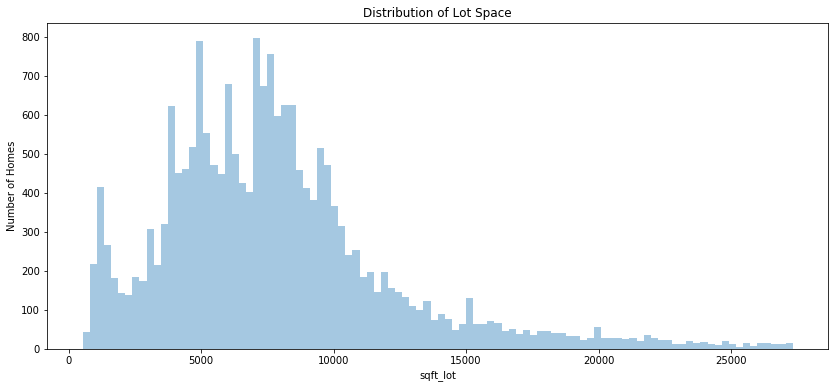

In [153]:
f, ax = plt.subplots(figsize = (14, 6))
fig = sns.distplot(df['sqft_lot'], bins = 100, kde = False)
plt.title('Distribution of Lot Space')
plt.ylabel('Number of Homes')
# positive skew with a very long tail

In [154]:
df.info()
# up until this point we have got rid of ~1800 observations, but still retain the majority of datapoints

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19715 entries, 0 to 21596
Data columns (total 23 columns):
id               19715 non-null int64
date             19715 non-null object
price            19715 non-null float64
bedrooms         19715 non-null int64
bathrooms        19715 non-null float64
sqft_living      19715 non-null int64
sqft_lot         19715 non-null int64
floors           19715 non-null float64
waterfront       17523 non-null float64
view             19715 non-null float64
condition        19715 non-null int64
grade            19715 non-null int64
sqft_above       19715 non-null int64
sqft_basement    19715 non-null int64
yr_built         19715 non-null int64
yr_renovated     19715 non-null float64
zipcode          19715 non-null int64
lat              19715 non-null float64
long             19715 non-null float64
sqft_living15    19715 non-null int64
sqft_lot15       19715 non-null int64
house_age        19715 non-null int64
renovated        19715 non-null int64


3.1.4 *Dropping waterfront null values*

Mapping analysis has showed us that there are several properties that are on the waterfront, so in order to negate any amiguity, it may be better to drop these observations.

In [155]:
df.waterfront.isna().sum()
# there are still 2192 houses that have null values
# map shows that they are spread out so it is not just getting rid of a specific area of housing

2192

In [156]:
df.drop(labels = df.loc[df.waterfront.isnull()].index, axis = 0 , inplace = True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
house_age        0
renovated        0
dtype: int64

In [157]:
# We now have no null values and outliers have been accounted for. Extreme values in sqft_above, sqft_basement etc have
# been accounted for through dropping outliers on sqft_living and sqft_lot
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,1.752300e+04,1.752300e+04,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,...,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000,17523.000000
mean,4.725804e+09,5.236648e+05,3.356731,2.085416,2008.466301,7855.140558,1.490726,0.006163,0.215774,3.413285,...,285.302174,1970.310620,66.877475,98080.139816,47.561983,-122.226336,1933.399133,7785.077841,44.689380,0.033499
std,2.872791e+09,3.333218e+05,0.901719,0.745280,833.318191,4457.155691,0.544202,0.078267,0.733964,0.652539,...,425.227681,29.942901,359.246704,54.135719,0.136489,0.132789,648.965007,5353.922781,29.942901,0.179940
min,1.000102e+06,7.800000e+04,1.000000,0.750000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000,0.000000,0.000000
25%,2.267000e+09,3.150000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,1950.000000,0.000000,98033.000000,47.479250,-122.334000,1470.000000,5000.000000,17.000000,0.000000
50%,4.057300e+09,4.400000e+05,3.000000,2.250000,1860.000000,7268.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,1972.000000,0.000000,98074.000000,47.573800,-122.259000,1798.000000,7350.000000,43.000000,0.000000
75%,7.501000e+09,6.250000e+05,4.000000,2.500000,2470.000000,9638.000000,2.000000,0.000000,0.000000,4.000000,...,550.000000,1998.000000,0.000000,98118.000000,47.678300,-122.150000,2280.000000,9382.500000,65.000000,0.000000
max,9.900000e+09,3.850000e+06,11.000000,7.500000,5860.000000,27332.000000,3.500000,1.000000,4.000000,5.000000,...,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,196591.000000,115.000000,1.000000


# Predictive Modelling 

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17523 entries, 1 to 21596
Data columns (total 23 columns):
id               17523 non-null int64
date             17523 non-null object
price            17523 non-null float64
bedrooms         17523 non-null int64
bathrooms        17523 non-null float64
sqft_living      17523 non-null int64
sqft_lot         17523 non-null int64
floors           17523 non-null float64
waterfront       17523 non-null float64
view             17523 non-null float64
condition        17523 non-null int64
grade            17523 non-null int64
sqft_above       17523 non-null int64
sqft_basement    17523 non-null int64
yr_built         17523 non-null int64
yr_renovated     17523 non-null float64
zipcode          17523 non-null int64
lat              17523 non-null float64
long             17523 non-null float64
sqft_living15    17523 non-null int64
sqft_lot15       17523 non-null int64
house_age        17523 non-null int64
renovated        17523 non-null int64


In [159]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [160]:
# outcome = 'price'
# x_cols = ['bedrooms', 'sqft_living', 'waterfront', 'view', 'house_age', 'renovated']
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors 
# model = ols(formula = formula, data = df).fit()
# model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     3670.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:24:37   Log-Likelihood:            -2.4057e+05
No. Observations:               17523   AIC:                         4.812e+05
Df Residuals:                   17516   BIC:                         4.812e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.863e+04   7558.297     -2.465      0.014   -3.34e+04   -3819.873
bedrooms    -5.367e+04   2384.549    -22.505      0.000   -5.83e+04    -4.9e+04
sqft_living   308.0709      2.824    109.077      0.000     302.535     313.607
waterfront   5.123e+05   2.33e+04     21.978      0.000    4.67e+05    5.58e+05
view         6.115e+04   2624.896     23.298      0.000     5.6e+04    6.63e+04
house_age    1917.7835     61.366     31.251      0.000    1797.500    2038.067
renovated     4.87e+04   9589.751      5.078      0.000    2.99e+04    6.75e+04
==============================================================================
Omnibus:                     7260.045   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78268.138
Skew:                           1.693   Prob(JB):                         0.00
Kurtosis:                      12.785   Cond. No.                     3.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


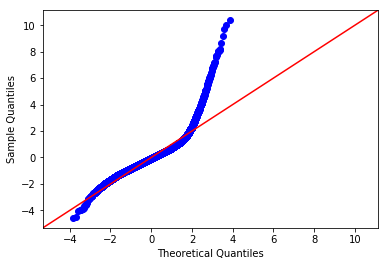

In [163]:
# # non_normal = df['sqft_living']
# # for var in non_normal:
# #     df[var] = df[var].map(lambda x: np.log(x))
    
# outcome = 'price'
# x_cols = ['sqft_living', 'waterfront', 'view', 'house_age', 'renovated']
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors 
# model = ols(formula = formula, data = df).fit()
# model.summary()

# residuals = model.resid
# fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
# fig.show()

Above shows the Q-Q plot 

# Regression of houses built in last 25 years

In our data analysis, we saw a trend of newly built houses decreasing in overall lot size, but increasing living space. For this reason we felt that running a regression with only houses that were built in the last 25 years may show more reliable relationships between our regressors and our target variable in price

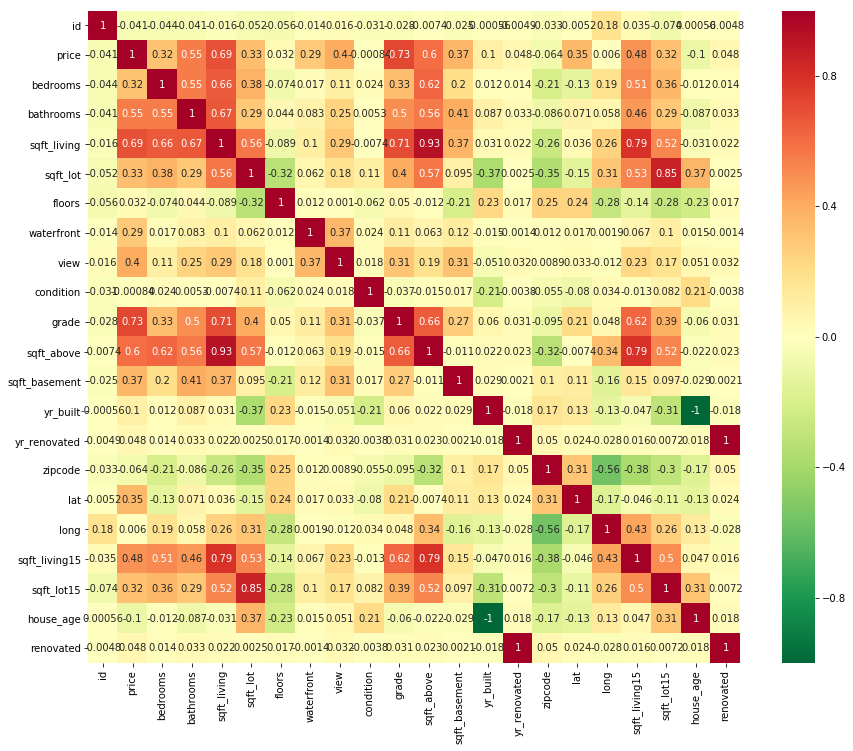

In [173]:
correlation_matrix = df_last_25_years.corr()
f, ax = plt. subplots(figsize = (15,12))
sns.heatmap(correlation_matrix, cmap = 'RdYlGn_r', annot = True, square = True)
# Correlation matrix with new DataFrame helps us to avoid colinearity 

In [167]:
df_last_25_years = df.loc[df['house_age'] < 25]
df_last_25_years.shape
# new DataFrame contains 5426 observations 

(5426, 23)

In [198]:
outcome = 'price'
x_cols =   ['sqft_living', 'grade', 'condition', 'view', 'lat']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model1 = ols(formula = formula, data = df_last_25_years).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2315.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:47:09   Log-Likelihood:                -73999.
No. Observations:                5426   AIC:                         1.480e+05
Df Residuals:                    5420   BIC:                         1.480e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.371e+07   9.91e+05    -34.004      0.000   -3.56e+07   -3.18e+07
sqft_living   157.5631      4.446     35.441      0.000     148.847     166.279
grade        1.132e+05   3831.113     29.541      0.000    1.06e+05    1.21e+05
condition    6.259e+04   1.48e+04      4.229      0.000    3.36e+04    9.16e+04
view         9.904e+04   4667.031     21.222      0.000    8.99e+04    1.08e+05
lat          6.892e+05   2.09e+04     32.990      0.000    6.48e+05     7.3e+05
==============================================================================
Omnibus:                     3939.828   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116241.977
Skew:                           3.135   Prob(JB):                         0.00
Kurtosis:                      24.791   Cond. No.                     9.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Comments on regression of houses built in the last 25 years

Using the same predictors as in our initial model, our new regression has more predictive power with a higher R squared value. Like all variables in the original model, the new model also has all variables having a statistically significant effect on house prices.

Bedrooms seem to be negatively correlated with price in this model, but this may be due to a reasonable amount of correlation between number of bedrooms and sqft_living as seen in our correlation matrix when analysing price (0.58). The warning above states that condition number is large, thus suggesting strong multicolinearity. In this case, as we exhibit positive correlation between sqft_living and bedrooms, by including both variables we lose some credibility in trying to isolate the effects of a single variable on price. If we wanted to find out the effect of increasing living space by one foot, we also would unintentionally measure the effect of an increase in bedrooms on price due to their positive correlation. In order to avoid this result, we could drop one of these variables from the regression.

In [184]:
outcome = 'price'
x_cols =  ['sqft_above', 'sqft_basement', 'house_age', 'renovated', 'grade', 'condition', 'view']
# note how bedroom has been dropped from the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model2 = ols(formula = formula, data = df_last_25_years).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1750.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:30:14   Log-Likelihood:                -74492.
No. Observations:                5426   AIC:                         1.490e+05
Df Residuals:                    5420   BIC:                         1.490e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.049e+06   5.71e+04    -18.382      0.000   -1.16e+06   -9.37e+05
sqft_living   133.2766      4.802     27.757      0.000     123.864     142.690
renovated     3.26e+05   1.28e+05      2.541      0.011    7.45e+04    5.77e+05
grade        1.466e+05   4045.704     36.224      0.000    1.39e+05    1.54e+05
condition    2.863e+04   1.62e+04      1.771      0.077   -3069.498    6.03e+04
view          9.66e+04   5112.091     18.896      0.000    8.66e+04    1.07e+05
==============================================================================
Omnibus:                     3218.572   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62431.771
Skew:                           2.460   Prob(JB):                         0.00
Kurtosis:                      18.873   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


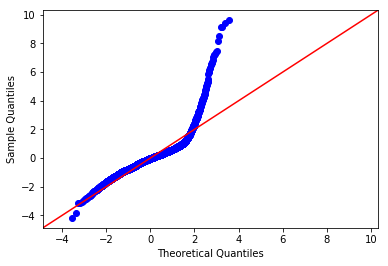

In [203]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Normal distributions would display no deviation from the red line but it seems that our regression veers off heavily from a normal distribution. 

# Regression of houses built over 25 years ago

In [186]:
df_greater_than_25_years = df.loc[df['house_age'] > 25]
df_greater_than_25_years.shape
# new DataFrame contains 11866 observations 

(11866, 23)

Similarly in our data analysis, we saw a trend of old houses increasing in overall lot size, and weakly increasing in living space. For this reason we felt that running a regression with houses that were built more than 25 years ago may show more reliable relationships between our regressors and our target variable in price

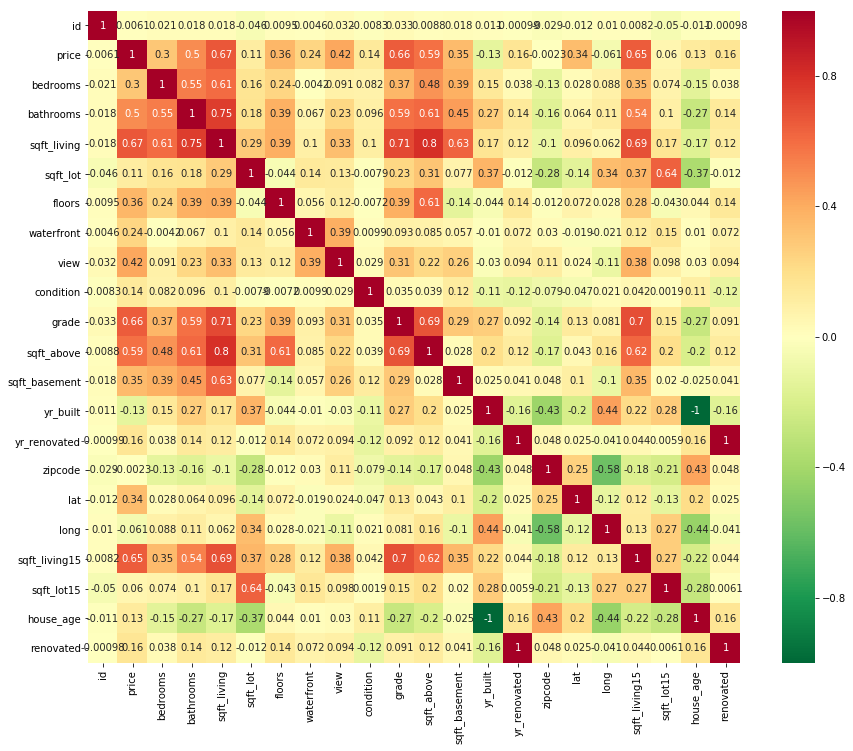

In [187]:
correlation_matrix = df_greater_than_25_years.corr()
f, ax = plt. subplots(figsize = (15,12))
sns.heatmap(correlation_matrix, cmap = 'RdYlGn_r', annot = True, square = True)
# Correlation matrix with new DataFrame helps us to avoid colinearity 

In [205]:
outcome = 'price'
x_cols =  ['sqft_above', 'sqft_basement', 'house_age',  'grade', 'condition',  'sqft_lot15']
# note how bedroom has been dropped from the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model3 = ols(formula = formula, data = df_greater_than_25_years).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     3093.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:13:22   Log-Likelihood:            -1.6156e+05
No. Observations:               11866   AIC:                         3.231e+05
Df Residuals:                   11859   BIC:                         3.232e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.243e+06   2.05e+04    -60.667      0.000   -1.28e+06    -1.2e+06
sqft_above      184.5604      4.513     40.891      0.000     175.713     193.408
sqft_basement   147.0886      4.436     33.160      0.000     138.394     155.783
house_age      4345.5996     85.166     51.025      0.000    4178.661    4512.539
grade          1.465e+05   2853.874     51.321      0.000    1.41e+05    1.52e+05
condition      2.296e+04   2590.254      8.863      0.000    1.79e+04     2.8e+04
sqft_lot15        0.6853      0.343      2.000      0.045       0.014       1.357
==============================================================================
Omnibus:                     5384.107   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67208.079
Skew:                           1.847   Prob(JB):                         0.00
Kurtosis:                      14.058   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


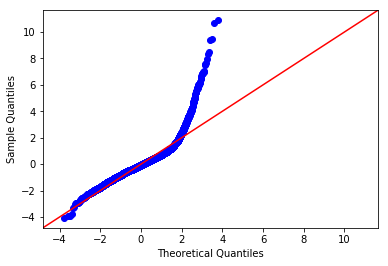

In [206]:
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

We seem to be getting the same visuals with our Q-Q plots. In order to take the next step, it may be worth observing the distribution plots of our regressors so that we can make a decision to transform data if needed

# Transforming our data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25a1b048>,
      dtype=object)

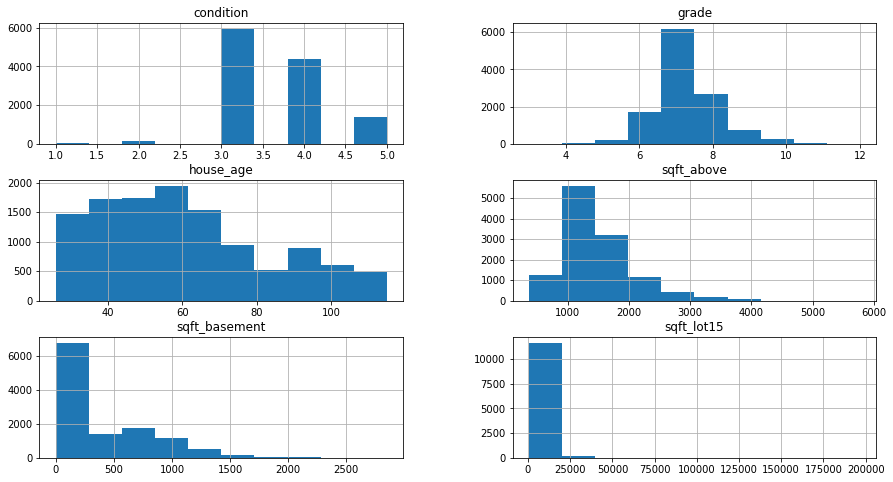

In [207]:
df_greater_than_25_years[['sqft_above', 'sqft_basement', 'house_age',  'grade', 'condition',  'sqft_lot15']].hist(figsize = (15,8))

Many of our variables do not follow a normal distribution so will require some transforming

Condition exhibits a negative skew so we could transform this by using a quadratic and manipulating the base


/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


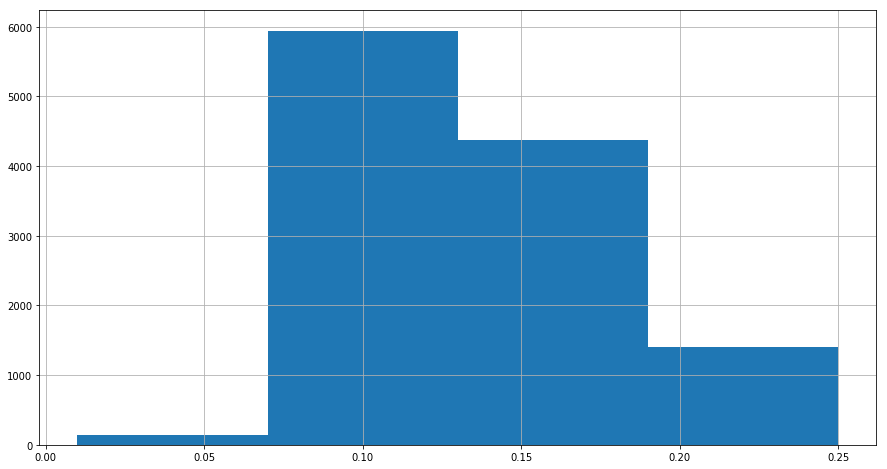

In [219]:
df_greater_than_25_years['condition_squared'] = df_greater_than_25_years['condition'].map(lambda x: (x/10)**2)
df_greater_than_25_years['condition_squared'].hist(bins = 4, figsize = (15,8))
# This distribution looks more normalised now

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


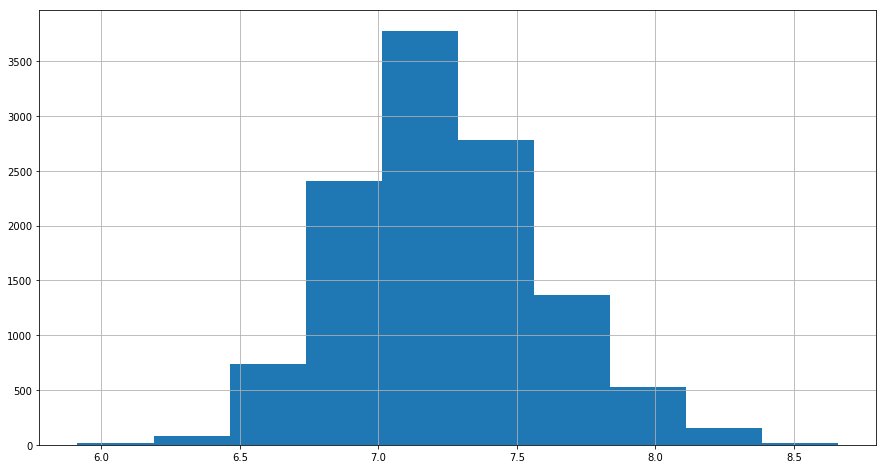

In [220]:
df_greater_than_25_years['log_sqft_above'] = np.log(df_greater_than_25_years['sqft_above'])
df_greater_than_25_years['log_sqft_above'].hist(figsize = (15,8))
# looks more normal

In [221]:
df_greater_than_25_years['log_sqft_basement'] = np.log(df_greater_than_25_years['sqft_basement'])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [222]:
df_greater_than_25_years['log_sqft_lot15'] = np.log(df_greater_than_25_years['sqft_lot15'])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c251a1518>,
      dtype=object)

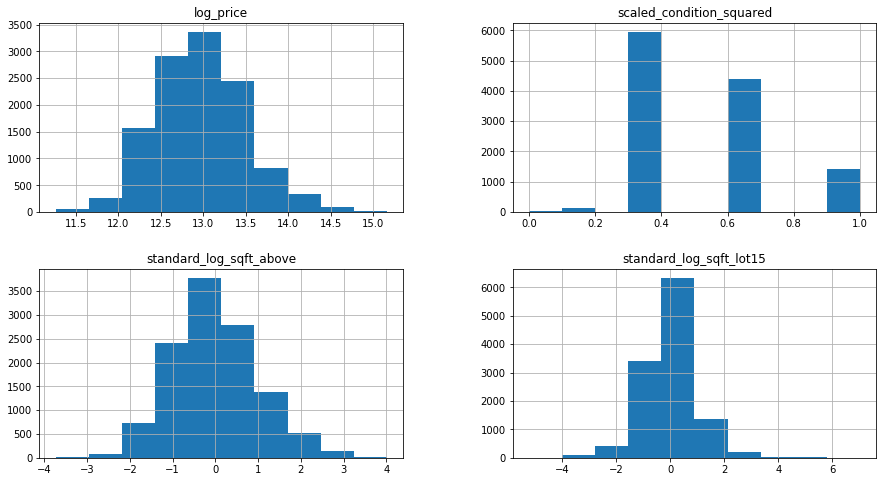

In [231]:
df_greater_than_25_years['condition_squared'] = df_greater_than_25_years['condition'].map(lambda x: (x/10)**2)
df_greater_than_25_years['log_sqft_above'] = np.log(df_greater_than_25_years['sqft_above'])
df_greater_than_25_years['log_sqft_lot15'] = np.log(df_greater_than_25_years['sqft_lot15'])
df_greater_than_25_years['log_price'] = np.log(df_greater_than_25_years['price'])

condition_squared = df_greater_than_25_years['condition_squared']
log_sqft_above = df_greater_than_25_years['log_sqft_above']
log_sqft_lot15 = df_greater_than_25_years['log_sqft_lot15']

scaled_condition_squared = (condition_squared - min(condition_squared))/(max(condition_squared) - min(condition_squared))
standard_log_sqft_above = (log_sqft_above - np.mean(log_sqft_above))/np.sqrt(np.var(log_sqft_above))
standard_log_sqft_lot15 = (log_sqft_lot15 - np.mean(log_sqft_lot15))/np.sqrt(np.var(log_sqft_lot15))

df_greater_than_25_years['scaled_condition_squared'] = scaled_condition_squared
df_greater_than_25_years['standard_log_sqft_above'] = standard_log_sqft_above
df_greater_than_25_years['standard_log_sqft_lot15'] = standard_log_sqft_lot15

df_greater_than_25_years[['log_price', 'scaled_condition_squared', 'standard_log_sqft_above', 'standard_log_sqft_lot15']].hist(figsize = (15,8))

In [233]:
outcome = 'log_price'
x_cols =  ['standard_log_sqft_above', 'house_age',  'grade', 'scaled_condition_squared',  'standard_log_sqft_lot15']
# note how bedroom has been dropped from the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model4 = ols(formula = formula, data = df_greater_than_25_years).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     3010.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:06:10   Log-Likelihood:                -4327.3
No. Observations:               11866   AIC:                             8667.
Df Residuals:                   11860   BIC:                             8711.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.0331      0.037    271.192      0.000       9.961      10.106
standard_log_sqft_above      0.1020      0.004     22.817      0.000       0.093       0.111
house_age                    0.0069      0.000     42.815      0.000       0.007       0.007
grade                        0.3324      0.005     71.824      0.000       0.323       0.342
scaled_condition_squared     0.1987      0.014     13.847      0.000       0.171       0.227
standard_log_sqft_lot15     -0.0306      0.004     -8.300      0.000      -0.038      -0.023
==============================================================================
Omnibus:                       28.008   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.882
Skew:                          -0.055   Prob(JB):                     7.24e-08
Kurtosis:                       3.233   Cond. No.                         761.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


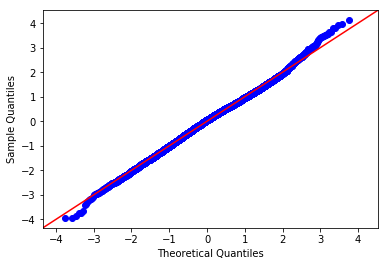

In [234]:
residuals = model4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Data is definitely more normal now that transformations are done. 